### Case Study

#### South African Hearth data set

1: Description.

A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal. 

The class label indicates if the person has a coronary heart disease: negative (0) or positive (1). 

Attributes description: 
- sbp: systolic blood pressure 
- tobacco: cumulative tobacco (kg) 
- ldl: low densiity lipoprotein cholesterol 
- adiposity 
- famhist: family history of heart disease (Present, Absent) 
- typea: type-A behavior 
- obesity 
- alcohol: current alcohol consumption 
- age: age at onset

2: Type.			Classification	

3: Origin.			Real world

4: Instances.		462

5: Features.		9

6: Classes.			2	

7: Missing values.	No


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('saheart.dat',sep = ',', header = 13, names = ['Sbp', 'Tobacco', 'Ldl', 'Adiposity',
                                                                'Famhist', 'Typea', 'Obesity', 'Alcohol', 'Age', 'Chd'])
df.head()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# Brief Exploration of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
Sbp          462 non-null int64
Tobacco      462 non-null float64
Ldl          462 non-null float64
Adiposity    462 non-null float64
Famhist      462 non-null object
Typea        462 non-null int64
Obesity      462 non-null float64
Alcohol      462 non-null float64
Age          462 non-null int64
Chd          462 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [5]:
df.Famhist.replace(['Absent', 'Present'], [0,1], inplace = True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [6]:
df.head()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [7]:
df.describe()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


- Alcohol has a steep steps indicating a heavily skewed distribution
- Tobacco and Ldl also has a steep increase from the 75% to the max 

C:\Users\georg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\georg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


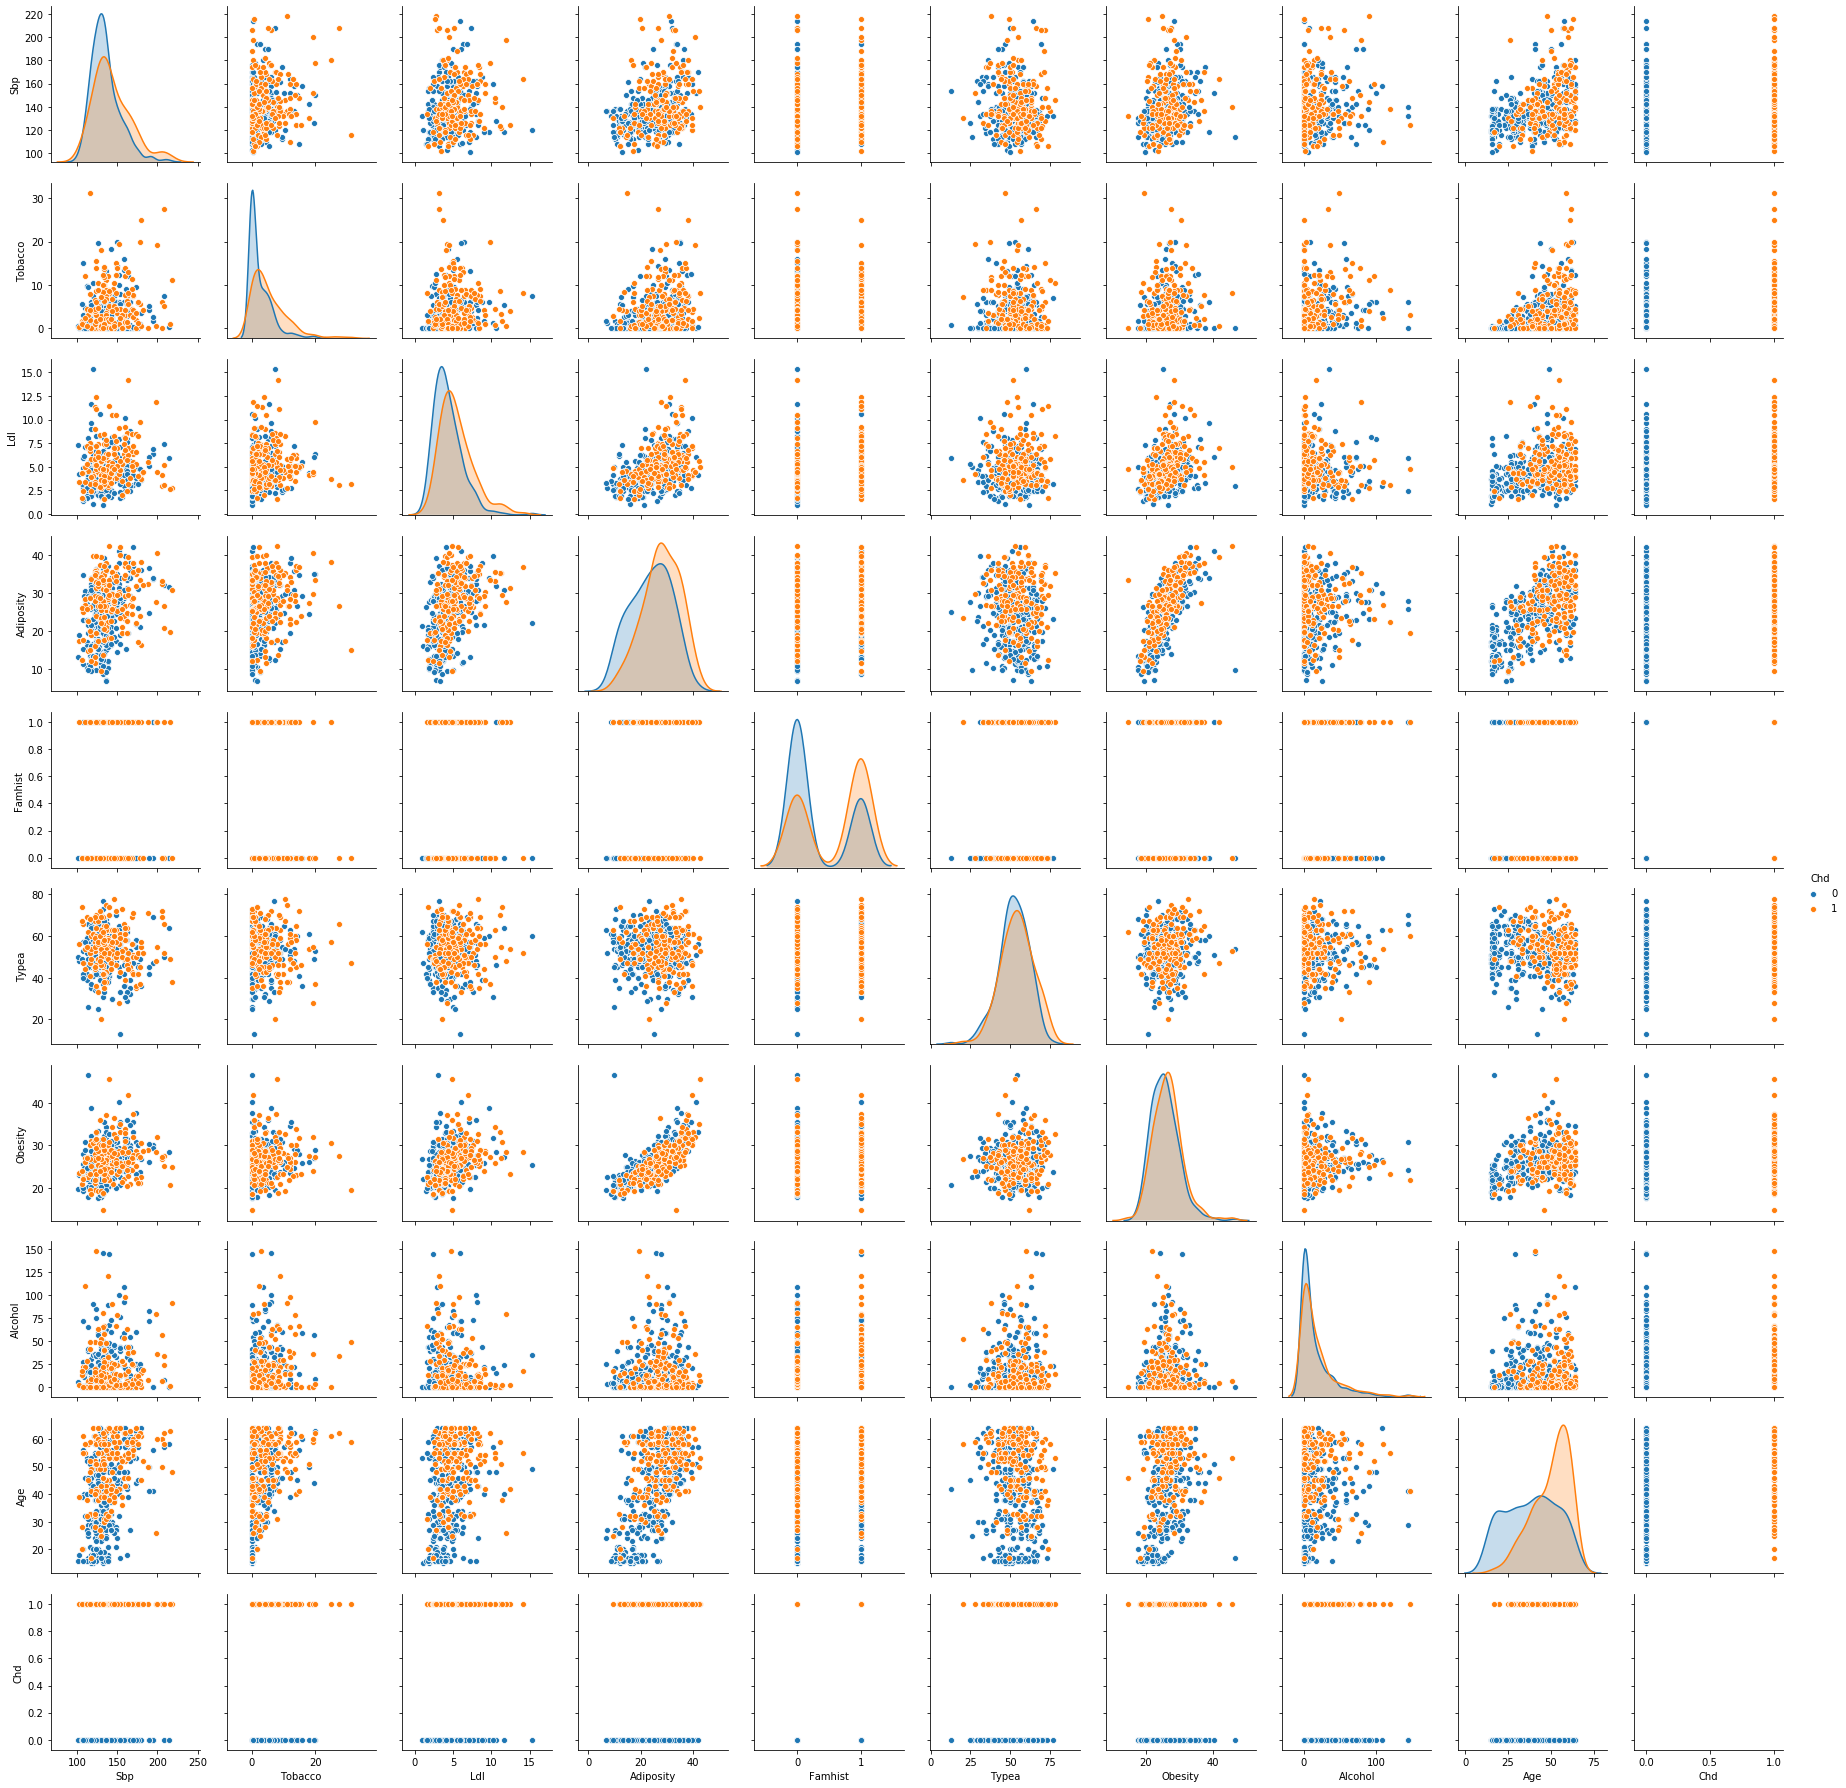

In [6]:
import seaborn as sns
sns.pairplot(df, diag_kind= 'kde', hue = 'Chd')
plt.show()

- None of the predictors by themselves seem to have a strong relation with the target
- There is some linear relationship between Adiposity and Obesity

#### Outlier check

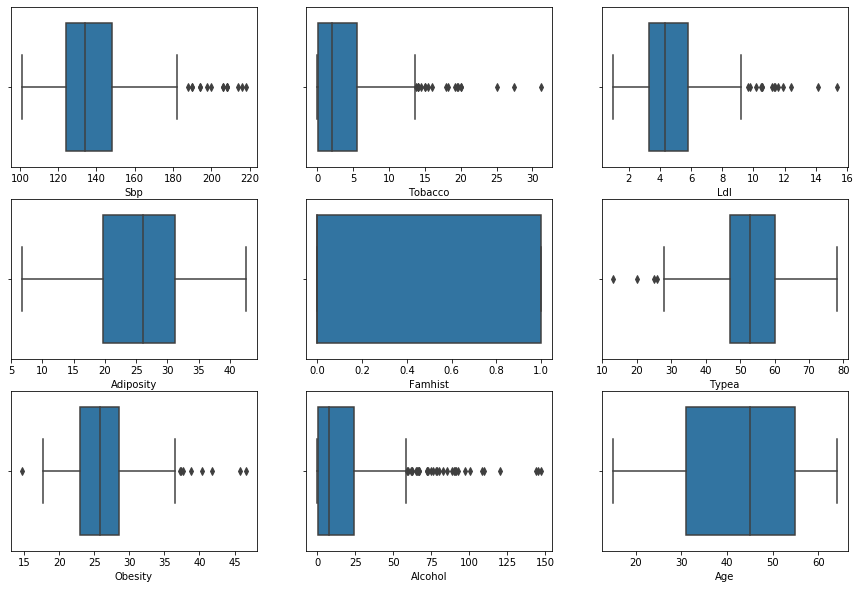

In [8]:
import seaborn as sns
plt.figure(figsize=(15,10))
pos = 1
for i in df.drop(columns = 'Chd').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

## George's Tip
- `plt.subplot`  https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html

- There are quiet a lot of outliers
- Lets treat them. But before that, we shall divide the entire data into train and test and treat only the train data, to maintain the sanctity of the test set

( try to use the dataset as it is, without treating the outliers and compare the performances of a given model, with and without outlier treatment)

#### Train test split

In [9]:
X = df.drop(columns= 'Chd')
y = df.Chd

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((369, 9), (93, 9), (369,), (93,))

## George's Challenge
- what does stratify mean?

In [11]:
for i in X_train.columns:
    q1, q2, q3 = X_train[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = X_train[i] > q3 + 1.5*IQR
    b = X_train[i] < q1 - 1.5*IQR
    X_train[i] = np.where(a | b, q2, X_train[i])  

C:\Users\georg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## George's Tip
- Variable unpacking
- Use `.loc` notation to avoid warning  https://www.kdnuggets.com/2020/04/stop-hurting-pandas.html

## George's Challenge
- What are we doing here?
- Explain this code: `X_train[i] = np.where(a | b, q2, X_train[i])`

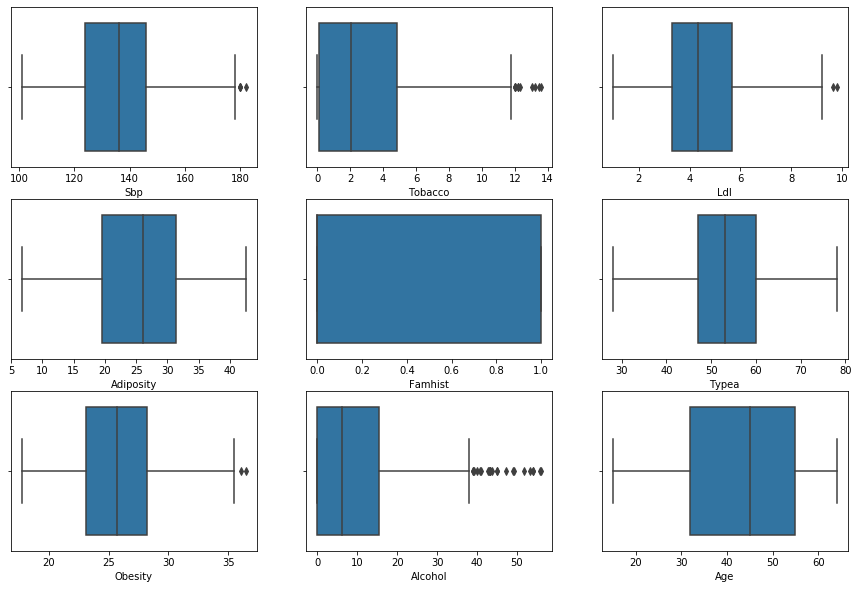

In [11]:
plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X_train[i])
    pos += 1 

## George's Challenge
- Why are there still outliers?

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
from sklearn.metrics import confusion_matrix

pred = logreg.predict(X_test)
confusion_matrix(y_test,pred).ravel()

array([53,  8, 15, 17], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix

pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg.score(X_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [lr_score], 'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.68,0.531,0.869,0.131


Meh...

**What can we do to make it better????**

In [14]:
y_train.value_counts()

0    241
1    128
Name: Chd, dtype: int64

## George's Challenge
- What is a drawback of downsample?

Smells like class imbalance, lets UP Sample!!! 

In [15]:
train = pd.concat([X_train, y_train], axis = 1)

extra_samples = train[train['Chd'] == 1].sample(n = 100, random_state = 1)

train_upsampled = pd.concat([train, extra_samples], axis = 0)

## George's Challenge
- What else can we do to upsample?

In [16]:
X_train = train_upsampled.drop(columns = 'Chd')
y_train = train_upsampled.Chd

X_train.shape

y_train.value_counts()

0    241
1    228
Name: Chd, dtype: int64

In [17]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_score = logreg.score(X_test, y_test)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [lr_score], 'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.75,0.754,0.246


- Accuracy remained the same but there is some good increase in the True positive rate 😃
- And some good decrease in the True negative rate 😐

What can we do? 
Lets see if we can improve the predicitons with a different threshold value

## George's Challenge
- What does the "threshold value" mean?

In [18]:
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score, roc_auc_score
 
t = 0.49   #threshold
proba = logreg.predict_proba(X_test)
pred_at_t = binarize(proba, t)[:,1]

tn, fp, fn, tp = confusion_matrix(y_test, pred_at_t).ravel()

lr_score = accuracy_score(y_test, pred_at_t)
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result.loc[1] = [f'Logistic Regression(t={t})', lr_score, lr_precision, lr_recall, lr_specificity, 1-lr_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.49),0.752688,0.610,0.781,0.738,0.262


- One could call that an improvement 🤐

#### If you can't change the model, CHANGE the model

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_score = dt.score(X_test, y_test)
dt_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
dt_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
dt_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result.loc[2] = ['Decision Tree', dt_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.49),0.752688,0.610,0.781,0.738,0.262
2,Decision Tree,0.612903,0.417,0.312,0.770,0.230


In [22]:
# Lets change the max depth

dt = DecisionTreeClassifier(max_depth= 4, random_state=1)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_score = dt.score(X_test, y_test)
dt_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
dt_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
dt_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd

result.loc[2] = ['Decision Tree', dt_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.49),0.752688,0.610,0.781,0.738,0.262
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

rf_score = rf.score(X_test, y_test)
rf_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
rf_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
rf_specificity =round(tn/(tn+fp),3) 

result.loc[3] = ['Random Forest', rf_score, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

C:\Users\georg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.49),0.752688,0.610,0.781,0.738,0.262
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115


##### Let us implement GridSearach CV for hyperparameter tuning.

In [ ]:
# Takes very long. The cell below has the best params that was obtained when this cell was executed. You can get the best parameters-
# by gs.best_params_

from sklearn.model_selection import GridSearchCV

grid = {'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600]}

gs = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1), 
    param_grid=grid, 
    cv=10, 
    n_jobs=-1, 
    verbose=2 
)

gs.fit(X_train, y_train)




Fitting 10 folds for each of 1188 candidates, totalling 11880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min


## George's Tip
- Indent your code for better readability and more professional looking!

## George' Challenge
- How many total iterations were completed?

In [24]:
forest = RandomForestClassifier( bootstrap = False,
  max_depth = 20,
  max_features =  'auto' ,
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 200, random_state= 1)

forest.fit(X_train, y_train)

pred = forest.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

forest_score = forest.score(X_test, y_test)
forest_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
forest_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
forest_specificity =round(tn/(tn+fp),3) 

result.loc[4] = ['Random forest(tuned)', forest_score, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.49),0.752688,0.610,0.781,0.738,0.262
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115


- Random forest does not seem like a good option for this data

In [25]:
from sklearn.svm import SVC

svm = SVC(C=1, gamma=1, kernel='rbf')

svm.fit(X_train, y_train)

pred = svm.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

svm_score = svm.score(X_test, y_test)
svm_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
svm_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
svm_specificity =round(tn/(tn+fp),3) 

result.loc[5] = ['SVM', svm_score, svm_precision, svm_recall, svm_specificity, 1 - svm_specificity]
result

C:\Users\georg\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.49),0.752688,0.610,0.781,0.738,0.262
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115
5,SVM,0.655914,NaN,0.000,1.000,0.000


- That is a 100% Specificity score 
- Lets see what is wrong

In [26]:
pd.Series(svm.predict(X_train)).value_counts()  # Predictions on the train data

0    241
1    228
dtype: int64

In [27]:
print(y_test.value_counts()) # Actual class distribution of the test data

0    61
1    32
Name: Chd, dtype: int64


In [28]:
pd.Series(pred).value_counts() # Predictions on the test data

0    93
dtype: int64

In [29]:
tn, fp, fn, tp   # Confusion matrix 

(61, 0, 32, 0)

- There are neither any false positives nor any true positives hence, there is nothing to calculate precision with 
- The model classified everything as negative class
- Lets try scale the data and then pass it to SVM since SVM gets influenced by the scale of the data


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(X_train)
scaled_train = scaler.transform(X_train)

scaled_test = scaler.transform(X_test)

svm = SVC(C=1, gamma= 0.01, kernel='rbf')

svm.fit(scaled_train, y_train)


pred = svm.predict(scaled_test)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

svm_score = svm.score(scaled_test, y_test)
svm_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
svm_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
svm_specificity =round(tn/(tn+fp),3) 

result.loc[6] = ['SVM_scaled_data', svm_score, svm_precision, svm_recall, svm_specificity, 1 - svm_specificity]
result


,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.49),0.752688,0.610,0.781,0.738,0.262
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115
5,SVM,0.655914,NaN,0.000,1.000,0.000
6,SVM_scaled_data,0.731183,0.590,0.719,0.738,0.262


In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 3, n_jobs=1000)

knn.fit(X_train, y_train)


pred = knn.predict(X_test)


tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

knn_score = knn.score(X_test, y_test)
knn_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
knn_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
knn_specificity =round(tn/(tn+fp),3) 


result.loc[7] = ['knn', knn_score, knn_precision, knn_recall, knn_specificity, 1 - knn_specificity]
result

,Model,Accuracy,Precision,True positive rate,True negative rate,False positive rate
0,Logistic Regression,0.752688,0.615,0.750,0.754,0.246
1,Logistic Regression(t=0.49),0.752688,0.610,0.781,0.738,0.262
2,Decision Tree,0.741935,0.618,0.656,0.787,0.213
3,Random Forest,0.698925,0.611,0.344,0.885,0.115
4,Random forest(tuned),0.688172,0.588,0.312,0.885,0.115
5,SVM,0.655914,NaN,0.000,1.000,0.000
6,SVM_scaled_data,0.731183,0.590,0.719,0.738,0.262
7,knn,0.602151,0.453,0.750,0.525,0.475


- Logistic regression gave us the best performance compared to all the other algorithms

# Links

- https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score
- https://medium.com/ai-techsystems/gaussian-distribution-why-is-it-important-in-data-science-and-machine-learning-9adbe0e5f8ac
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/60861
- https://www.dummies.com/programming/big-data/data-science/transforming-distributions-machine-learning/
- https://datascience.stackexchange.com/questions/20237/why-do-we-convert-skewed-data-into-a-normal-distribution
- https://stats.stackexchange.com/questions/420140/why-do-lots-of-people-want-to-transform-skewed-data-into-normal-distributed-data
- https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496
- https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989